# Data analysis with Pandas
This notebook consist the folloowing;
- Program in Python using jupyter notebook.
- Perform data analysis using Pandas.
- Practice data pre-processing methods.
- Analyze and summarise dataset by finding facts from the data.

In this notebook, we used Pandas to read Adult dataset and to perform some basic analysis to improve
our understand of the dataset by completing the notebook and answering questions provided in the notebook.
We also be used matplotlib for data visualisation.
The notebook also introduce data pre-processing, which is an important phase of data mining. We
used sklearn for using data mining (and machine learning) algorithms.
- To run the notebook, restart the Kernal by selecting Restart & Clear Output. Than run each cell one at a time.

In [9]:
#%pip install pandas
#%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
# Load the data
df = pd.read_csv('adult.csv')

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.shape

(32561, 15)

- The data.shape tells us the dimensionality of the dataset. In this case, there are 32561 rows and 15 columns.


In [14]:
# Let's see the total number of people in each education-num
df['education-num'].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [15]:
# Let's see the total number of people in each education level
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [16]:
## since the attribute 'fnlwgt' doesn't tells much for us, will have to drop it
df.drop('fnlwgt', axis=1, inplace=True)

In [17]:
# Let's see the data frame to make sure the column is dropped
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
# Let's the nuique values in the 'education' column
df['education'].nunique()

16

In [19]:
df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

- Using value_counts() for ‘age’ is not a great example as the frequence table is too lengthy to be
analysed. This is due to ‘age’ being continuous value and frequency of each value is displayed. Let’s
visualise ‘age’ through graphs instead to make observations.

<Axes: >

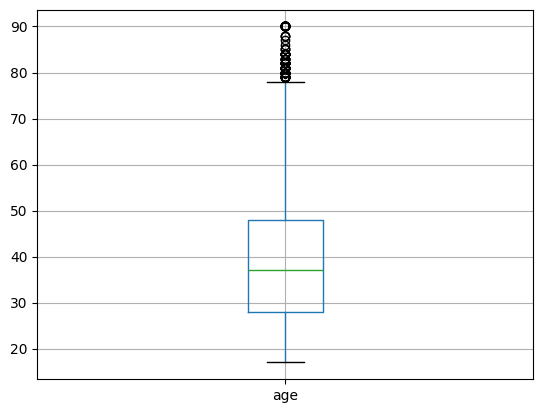

In [13]:
df.boxplot(column='age' )

<Axes: >

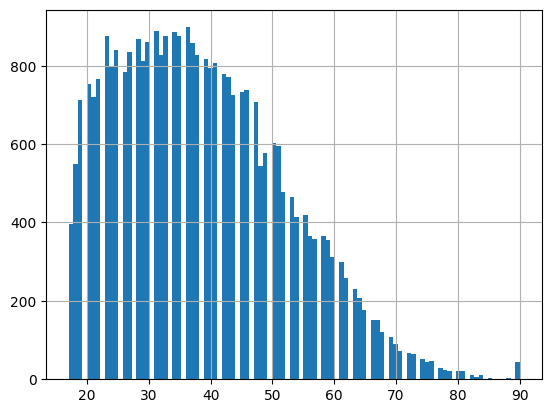

In [20]:
df['age'].hist(bins=100)

In [21]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [22]:
# let's print the columns in the data frame
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class-label'],
      dtype='object')

In [23]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

#### Q1. How many males and females exist in the dataset?

In [24]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

##### Q1. Ans = Male = 21790, Female = 10771 

### Applying groupby functions in order to summarise the data
- Groupby functions are usually used with aggregate functions, which are useful to summarise
the dataset and make observations. Some common functions are SUM, MEAN, MAX, MIN
and COUNT. Using groupby, we can answer questions such as: 

#### Q2: What is the average age of each gender in the given population?

In [25]:
df['age'].groupby(df['sex']).mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

#### Q3. What is the average age of male and female across different education categories?

In [26]:
df['age'].groupby([df['sex'],df['education']]).mean()

sex     education   
Female  10th            35.447458
        11th            30.546296
        12th            29.756944
        1st-4th         48.521739
        5th-6th         44.369048
        7th-8th         49.693750
        9th             42.131944
        Assoc-acdm      36.361045
        Assoc-voc       37.872000
        Bachelors       35.635578
        Doctorate       45.325581
        HS-grad         38.678171
        Masters         43.074627
        Preschool       41.750000
        Prof-school     40.195652
        Some-college    33.740556
Male    10th            38.346395
        11th            33.407806
        12th            33.117647
        1st-4th         45.245902
        5th-6th         42.385542
        7th-8th         48.034979
        9th             40.643243
        Assoc-acdm      38.046440
        Assoc-voc       38.939909
        Bachelors       40.321734
        Doctorate       48.327217
        HS-grad         39.115736
        Masters         44.

#### Q4: What is the average contribution to captital-gain of each of each sex and occupation category?

In [27]:
df['capital-gain'].groupby([df['sex'],df['occupation']]).mean()

sex     occupation       
Female  ?                     337.712247
        Adm-clerical          504.761529
        Craft-repair          756.851351
        Exec-managerial      1013.524590
        Farming-fishing      1034.415385
        Handlers-cleaners     135.725610
        Machine-op-inspct     172.238182
        Other-service         154.655556
        Priv-house-serv       291.517730
        Prof-specialty       1296.139934
        Protective-serv      1665.842105
        Sales                 277.624703
        Tech-support          659.037356
        Transport-moving      456.733333
Male    ?                     828.404192
        Adm-clerical          477.834550
        Armed-Forces            0.000000
        Craft-repair          643.366521
        Exec-managerial      2760.839353
        Farming-fishing       558.612487
        Handlers-cleaners     274.142620
        Machine-op-inspct     387.951102
        Other-service         235.424080
        Priv-house-serv        

#### Q5. Identify the average capital-gain by males and females across different marital-status.

In [28]:
df['capital-gain'].groupby([df['sex'],df['marital-status']]).mean()

sex     marital-status       
Female  Divorced                  446.004491
        Married-AF-spouse         189.500000
        Married-civ-spouse       1609.755582
        Married-spouse-absent     360.785366
        Never-married             328.202853
        Separated                 346.366086
        Widowed                   489.147879
Male    Divorced                 1154.501976
        Married-AF-spouse         810.888889
        Married-civ-spouse       1784.155792
        Married-spouse-absent     936.169014
        Never-married             415.576403
        Separated                 838.581218
        Widowed                   973.375000
Name: capital-gain, dtype: float64

#### Q5. What is the maximum age across different races?

In [30]:
df['age'].groupby(df['race']).max()

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64

#### Q6. Are the minimum and maximum age by sex the same?

In [31]:
df['age'].groupby(df['sex']).max()

sex
Female    90
Male      90
Name: age, dtype: int64

- Maximum age of both male and female are the same as the above cell shows

In [32]:
df['age'].groupby(df['sex']).min()

sex
Female    17
Male      17
Name: age, dtype: int64

- Minimum age of both sex are the same as it can be seen in the above cell

### Data visualisation
- Matplotlib is python library for visualising data in the form of grapjs such as histograms, scatter, box plot, line plots, heat plots, etc...

<Axes: >

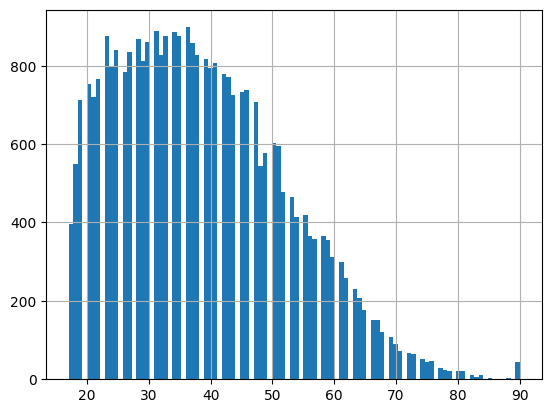

In [33]:
df['age'].hist(bins=100)

Histogram is used to represent the distrubtion of dataset. The bars of the histograms are known
as bins or “bucket” - the range of values. Bins are of same width. Width of the bins are cacluated
as (max value of data - min value of data) / total number of bins. The bins are usually specified
as continuous, non-overlapping intervals of a variable.

- In the above figure, histogram with bins = 100 is used to show number of people belongs to
different age-groups.

<Axes: >

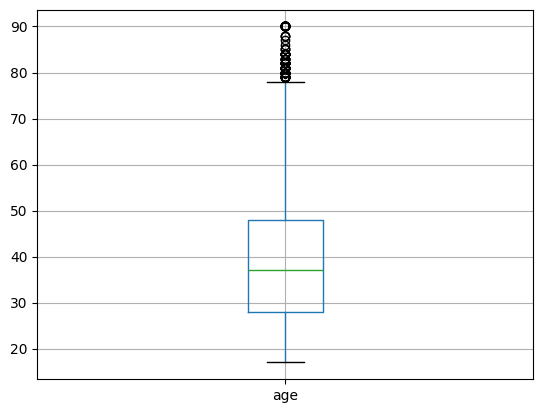

In [34]:
df.boxplot(column='age')

- The box plot above indicates the average number of people belong into whic age-range group

<Axes: >

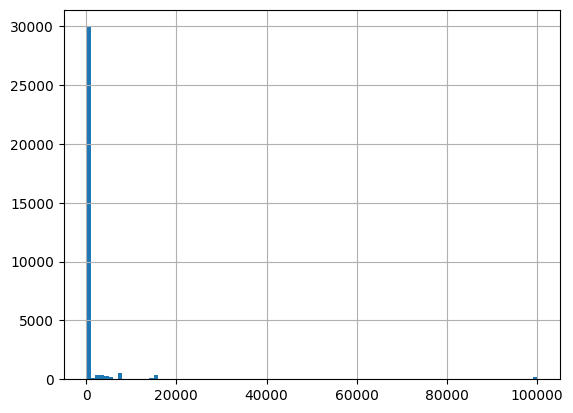

In [35]:
df['capital-gain'].hist(bins=100)

<Axes: >

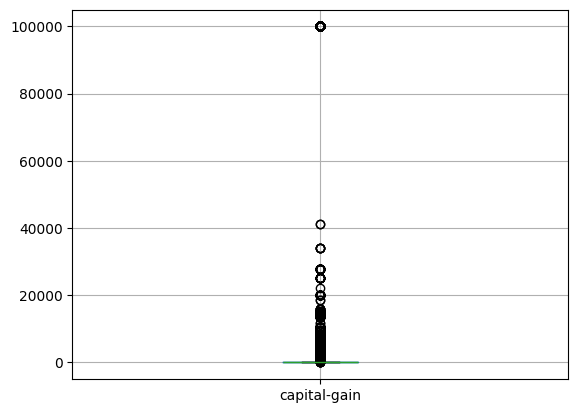

In [36]:
df.boxplot(column='capital-gain')

<Axes: title={'center': 'age'}, xlabel='education'>

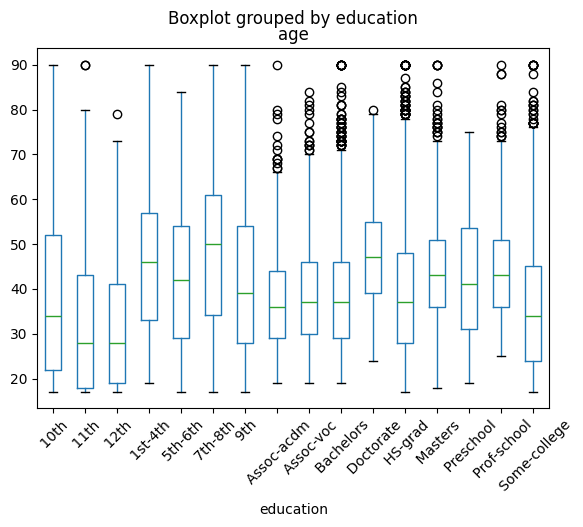

In [37]:
df.boxplot(column='age', by='education', grid=False, rot=45, fontsize=10)

<Axes: title={'center': 'capital-gain'}, xlabel='education'>

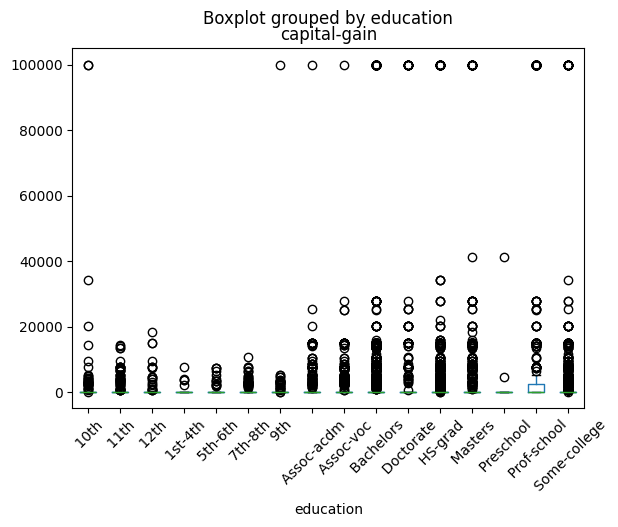

In [38]:
df.boxplot(column='capital-gain', by='education', grid=False, rot=45, fontsize=10)

- After performing some basic data analysis, let’s look at data pre-processing to improve the
quality of the dataset.
- Data pre-processing is an important step in the process. Raw data can be unstrutured and
full of noise. Aim of this phase is to clean the raw data, reduce noise and to prepare the
dataset that can be accepted by the algorithm as an input. Remember garbage in, garbage
out!

- Let's check for NULL values in the dataset

In [39]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class-label       0
dtype: int64

- We notice that the missing values are not picked up by this code. As the NULL or missing
values are replaced by ‘?’. It is important that we treat NULL or missing values in our dataset,
which is usually done in a data pre-processing phase of data mining.

### Data transformation
#### Label enconding
- Some attributes are categorical, therefore (statistical) analysis on those variables is not possible. We need to convert all categorical variables (string labels) into numeric by encoding the
categories. Package ‘sklearn’ provides ‘LabelEncoder’ library for encoding labels between 0
to n-1 discrete values/labels, where n is the number of values/labels. E.g.: Male -> 0 Female
-> 1


In [42]:
# Install the sklearn package
#%pip install scikit-learn

# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

In [43]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class-label       object
dtype: object

In [48]:
# The code line below will list columns that are of type 'int64'
columns = list(df.select_dtypes(exclude=['int64']).columns)
columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class-label']

In [51]:
df['class-label'].value_counts()

class-label
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [52]:
le = LabelEncoder()

for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

age               int64
workclass         int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
class-label       int64
dtype: object

In [53]:
df['workclass'].value_counts()

workclass
4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: count, dtype: int64

- We can see that all the valuess are now numeric. Now, more computation and analysis can
be performed on the dataset.

<Axes: >

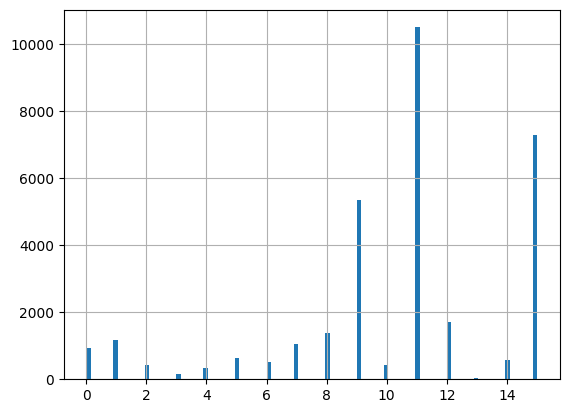

In [54]:
df['education'].hist(bins=100)

In [55]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000
